In [4]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from numpy import unique
from numpy import where
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
%matplotlib inline

In [5]:
df = pd.read_csv("Mall_Customers.csv")

df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [6]:
df.drop(["CustomerID"], axis = 1, inplace = True)

In [7]:
encoder = LabelEncoder()
Gender_ec = encoder.fit_transform(df.iloc[:,0])

In [8]:
df["Gender"] = Gender_ec

In [9]:
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40


In [10]:
scaler = StandardScaler()
scaled = scaler.fit_transform(df)

In [11]:
df1 = pd.DataFrame(data = scaled, columns = ["Gender", "Age", "Annual Income (k$)", "Spending Score (1-100)"])

In [12]:
pca = PCA(n_components = 2)
df2 = pca.fit_transform(df1)
df2

array([[-4.06382715e-01, -5.20713635e-01],
       [-1.42767287e+00, -3.67310199e-01],
       [ 5.07605706e-02, -1.89406774e+00],
       [-1.69451310e+00, -1.63190805e+00],
       [-3.13108383e-01, -1.81048272e+00],
       [-1.71744627e+00, -1.59926418e+00],
       [ 7.90821124e-01, -1.94727112e+00],
       [-2.14832159e+00, -1.50537369e+00],
       [ 2.77428623e+00, -8.82987672e-01],
       [-1.21629477e+00, -1.61640464e+00],
       [ 2.62905084e+00, -8.61237043e-01],
       [-1.68947038e+00, -1.54542784e+00],
       [ 1.68582253e+00, -2.02394479e+00],
       [-1.64607339e+00, -1.52251259e+00],
       [ 1.17443628e+00, -6.12790961e-01],
       [-1.32613070e+00, -2.36719149e-01],
       [ 1.67728253e-02, -1.74344572e+00],
       [-1.07842454e+00, -2.44715641e-01],
       [ 1.48758780e+00, -5.72676028e-01],
       [-1.66373169e+00, -1.43259774e+00],
       [ 4.88090311e-01, -3.92921145e-01],
       [-1.01895051e+00, -1.66247511e-01],
       [ 1.35891492e+00, -1.82866936e+00],
       [-7.

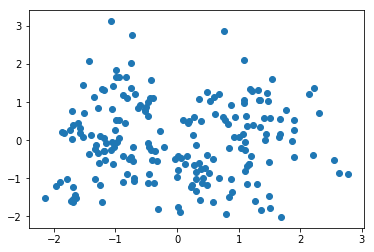

In [10]:
plt.scatter(df2[:, 0], df2[:, 1])

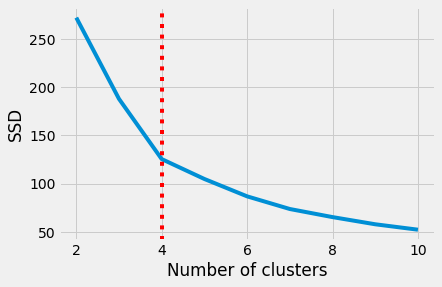

In [32]:
from sklearn.cluster import KMeans
ssd = []
for k in range(2, 11):
    kmean = KMeans(n_clusters = k).fit(df2)
    ssd.append([k, kmean.inertia_])
    
temp = pd.DataFrame(ssd)
ax = plt.axes()
ax.plot(temp[0], temp[1]) # plot the SSDs for each n_clusters
ax.axvline(4, ls='dotted',color='red') # elbow formed as 4
plt.xlabel('Number of clusters')
plt.ylabel('SSD')
plt.show()

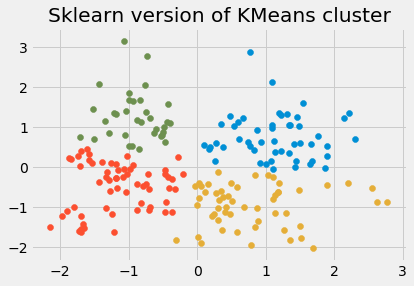

In [80]:
from sklearn.cluster import KMeans

model = KMeans(n_clusters = 4)
yhat = model.fit_predict(df2)
clusters = unique(yhat)
for cluster in clusters:
    row_ix = where(yhat == cluster)
    plt.scatter(df2[row_ix, 0], df2[row_ix, 1])
    plt.title("Sklearn version of KMeans cluster")
    plt.style.use('fivethirtyeight')

#### K-Means perform well it create good clusters but it some points are mixed misclassify if the line is drawn.

In [81]:
mydict = {i: np.where(model.labels_ == i)[0] for i in range(model.n_clusters)}

# Transform this dictionary into list (if you need a list as result)
dictlist = []
for key, value in mydict.items():
    temp = [key, value]
    dictlist.append(temp)

In [82]:
dictlist[0]

[0, array([ 42,  53,  55,  57,  59,  60,  64,  70,  74,  77,  80,  81,  82,
         85,  92,  98, 102, 104, 107, 108, 109, 110, 126, 128, 130, 134,
        138, 144, 146, 150, 156, 158, 162, 164, 166, 168, 170, 172, 174,
        176, 178, 180, 182, 184, 186, 188, 190, 192, 194, 196, 198],
       dtype=int32)]

In [83]:
df3 = df.values

In [85]:
## To get items from the original dataset
accessed_mapping = map(df3.__getitem__, dictlist[0])
cl1 = list(accessed_mapping)
cluster_1 = pd.DataFrame(cl1[1], columns = ["Gender", "Age", "Annual Income (k$)", "Spending Score (1-100)"])

accessed_mapping = map(df3.__getitem__, dictlist[1])
cl2 = list(accessed_mapping)
cluster_2 = pd.DataFrame(cl2[1], columns = ["Gender", "Age", "Annual Income (k$)", "Spending Score (1-100)"])

accessed_mapping = map(df3.__getitem__, dictlist[2])
cl3 = list(accessed_mapping)
cluster_3 = pd.DataFrame(cl3[1], columns = ["Gender", "Age", "Annual Income (k$)", "Spending Score (1-100)"])

accessed_mapping = map(df3.__getitem__, dictlist[3])
cl4 = list(accessed_mapping)
cluster_4 = pd.DataFrame(cl4[1], columns = ["Gender", "Age", "Annual Income (k$)", "Spending Score (1-100)"])

In [86]:
print("*" * 75)
print("The Average age of Customers in cluster 1 is:")
print(cluster_1.Age.mean())
print("*" * 75)
print("The Number of Male(1) and female(0) customers in cluster 1 are:")
print(cluster_1["Gender"].value_counts())
print("*" * 75)
print("The Average annual income (in dollars) of Customers in category 1 is:")
print(cluster_1["Annual Income (k$)"].mean())
print("*" * 75)
print("The Mean,Median and Mode of spending Score of people in category 1 is:")
print(cluster_1["Spending Score (1-100)"].mode())
print("*" * 75)

***************************************************************************
The Average age of Customers in cluster 1 is:
47.64705882352941
***************************************************************************
The Number of Male(1) and female(0) customers in cluster 1 are:
1    42
0     9
Name: Gender, dtype: int64
***************************************************************************
The Average annual income (in dollars) of Customers in category 1 is:
74.62745098039215
***************************************************************************
The Mean,Median and Mode of spending Score of people in category 1 is:
0    46
dtype: int64
***************************************************************************


In [87]:
## Final Report of Cluster 2

print("*" * 75)
print("The Average age of Customers in cluster 2 is:")
print(cluster_2.Age.mean())
print("*" * 75)
print("The Number of Male(1) and female(0) customers in cluster 2 are:")
print(cluster_2["Gender"].value_counts())
print("*" * 75)
print("The Average annual income (in dollars) of Customers in category 2 is:")
print(cluster_2["Annual Income (k$)"].mean())
print("*" * 75)
print("The Mean,Median and Mode of spending Score of people in category 2 is:")
print(cluster_2["Spending Score (1-100)"].mode())
print("*" * 75)

***************************************************************************
The Average age of Customers in cluster 2 is:
27.295081967213115
***************************************************************************
The Number of Male(1) and female(0) customers in cluster 2 are:
0    50
1    11
Name: Gender, dtype: int64
***************************************************************************
The Average annual income (in dollars) of Customers in category 2 is:
49.81967213114754
***************************************************************************
The Mean,Median and Mode of spending Score of people in category 2 is:
0    73
dtype: int64
***************************************************************************


In [88]:
## Final Report of Cluster 3

print("*" * 75)
print("The Average age of Customers in cluster 3 is:")
print(cluster_3.Age.mean())
print("*" * 75)
print("The Number of Male(1) and female(0) customers in cluster 3 are:")
print(cluster_3["Gender"].value_counts())
print("*" * 75)
print("The Average annual income (in dollars) of Customers in category 3 is:")
print(cluster_3["Annual Income (k$)"].mean())
print("*" * 75)
print("The Mean,Median and Mode of spending Score of people in category 3 is:")
print(cluster_3["Spending Score (1-100)"].mode())
print("*" * 75)

***************************************************************************
The Average age of Customers in cluster 3 is:
49.22222222222222
***************************************************************************
The Number of Male(1) and female(0) customers in cluster 3 are:
0    47
1     7
Name: Gender, dtype: int64
***************************************************************************
The Average annual income (in dollars) of Customers in category 3 is:
46.22222222222222
***************************************************************************
The Mean,Median and Mode of spending Score of people in category 3 is:
0    35
dtype: int64
***************************************************************************


In [89]:
## Final Report of Cluster 4

print("*" * 75)
print("The Average age of Customers in cluster 4 is:")
print(cluster_4.Age.mean())
print("*" * 75)
print("The Number of Male(1) and female(0) customers in cluster 4 are:")
print(cluster_4["Gender"].value_counts())
print("*" * 75)
print("The Average annual income (in dollars) of Customers in category 4 is:")
print(cluster_4["Annual Income (k$)"].mean())
print("*" * 75)
print("The Mean,Median and Mode of spending Score of people in category 4 is:")
print(cluster_4["Spending Score (1-100)"].mode())
print("*" * 75)

***************************************************************************
The Average age of Customers in cluster 4 is:
29.91176470588235
***************************************************************************
The Number of Male(1) and female(0) customers in cluster 4 are:
1    28
0     6
Name: Gender, dtype: int64
***************************************************************************
The Average annual income (in dollars) of Customers in category 4 is:
81.5
***************************************************************************
The Mean,Median and Mode of spending Score of people in category 4 is:
0    75
dtype: int64
***************************************************************************


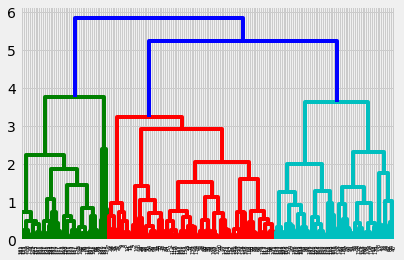

In [90]:
from sklearn.cluster import AgglomerativeClustering 
import plotly.figure_factory as ff
mergings = linkage(df2, method="complete", metric='euclidean')
dendrogram(mergings)
plt.show()


#### Longest vertical distance is on 4 horizontal line hence the optimal clusters will be 4.

0.5


C:\Users\Hp\Anaconda3\anaconda\lib\site-packages\sklearn\cluster\_affinity_propagation.py:154: FutureWarning:

'random_state' has been introduced in 0.23. It will be set to None starting from 1.0 (renaming of 0.25) which means that results will differ at every function call. Set 'random_state' to None to silence this warning, or to 0 to keep the behavior of versions <0.23.



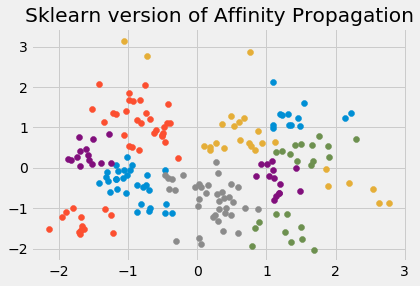

0.6


C:\Users\Hp\Anaconda3\anaconda\lib\site-packages\sklearn\cluster\_affinity_propagation.py:154: FutureWarning:

'random_state' has been introduced in 0.23. It will be set to None starting from 1.0 (renaming of 0.25) which means that results will differ at every function call. Set 'random_state' to None to silence this warning, or to 0 to keep the behavior of versions <0.23.



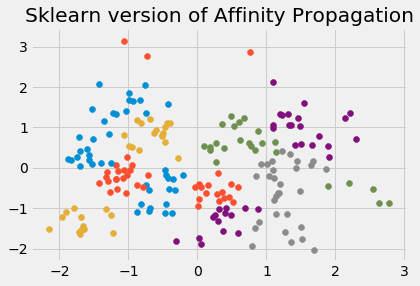

0.7


C:\Users\Hp\Anaconda3\anaconda\lib\site-packages\sklearn\cluster\_affinity_propagation.py:154: FutureWarning:

'random_state' has been introduced in 0.23. It will be set to None starting from 1.0 (renaming of 0.25) which means that results will differ at every function call. Set 'random_state' to None to silence this warning, or to 0 to keep the behavior of versions <0.23.



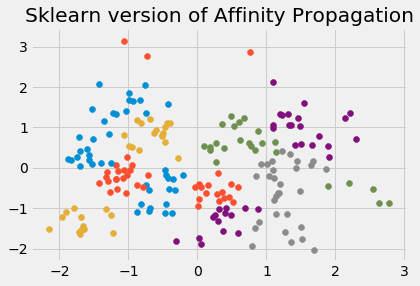

0.8


C:\Users\Hp\Anaconda3\anaconda\lib\site-packages\sklearn\cluster\_affinity_propagation.py:154: FutureWarning:

'random_state' has been introduced in 0.23. It will be set to None starting from 1.0 (renaming of 0.25) which means that results will differ at every function call. Set 'random_state' to None to silence this warning, or to 0 to keep the behavior of versions <0.23.



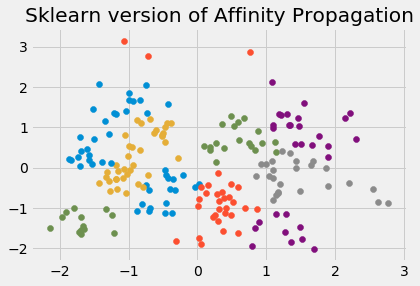

0.9


C:\Users\Hp\Anaconda3\anaconda\lib\site-packages\sklearn\cluster\_affinity_propagation.py:154: FutureWarning:

'random_state' has been introduced in 0.23. It will be set to None starting from 1.0 (renaming of 0.25) which means that results will differ at every function call. Set 'random_state' to None to silence this warning, or to 0 to keep the behavior of versions <0.23.



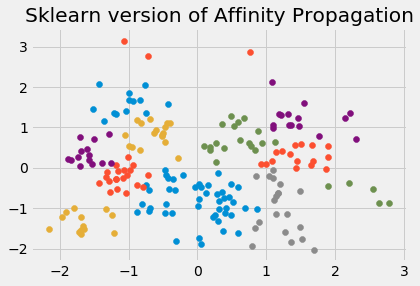

In [92]:
from sklearn.cluster import AffinityPropagation
d = [0.5,0.6,0.7,0.8,0.9]
for i in range(len(d)):
    v = d[i]
    print(v)
    model = AffinityPropagation(damping=v)
    model.fit(df2)
    yhat = model.predict(df2)
    clusters = unique(yhat)
    for cluster in clusters:
        row_ix = where(yhat == cluster)
        plt.scatter(df2[row_ix, 0], df2[row_ix, 1])
        plt.title("Sklearn version of Affinity Propagation")
        plt.style.use('fivethirtyeight')
    plt.show()

#### Affinity prpagation is not suitable for this dataset as it creates too many clusters at every damping value.

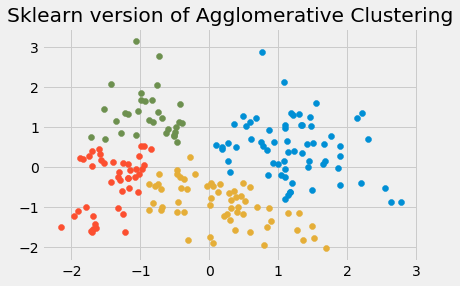

In [101]:
from sklearn.cluster import AgglomerativeClustering
model = AgglomerativeClustering(n_clusters=4)
yhat = model.fit_predict(df2)
clusters = unique(yhat)
for cluster in clusters:
    row_ix = where(yhat == cluster)
    plt.scatter(df2[row_ix, 0], df2[row_ix, 1])
    plt.title("Sklearn version of Agglomerative Clustering")
    plt.style.use('fivethirtyeight')

#### Agglomerative perform well in this dataset.

0.17


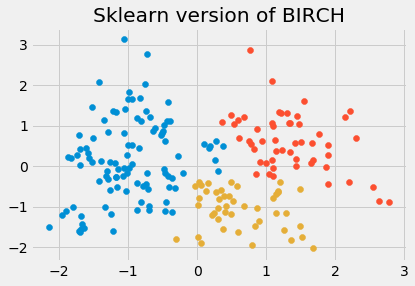

0.33


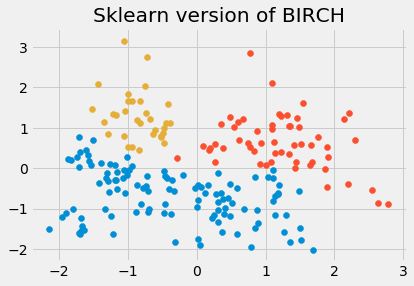

0.1


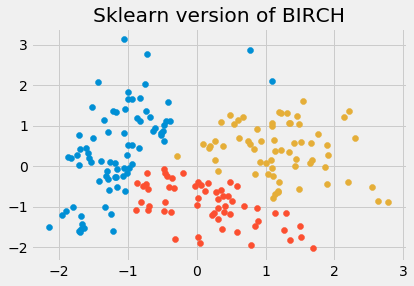

0.5


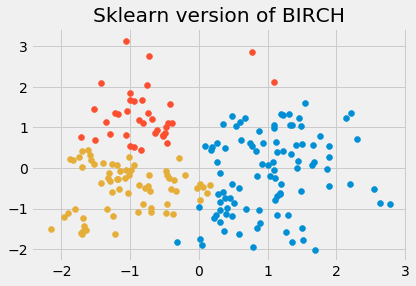

0.8


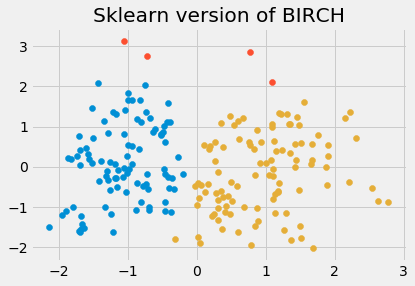

1


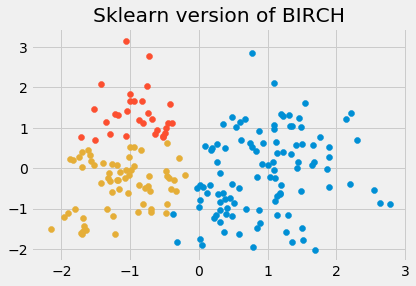

In [106]:
from sklearn.cluster import Birch
b = [0.17,0.33,0.1,0.5,0.8,1]
for i in range(len(b)):
    v = b[i]
    print(v)
    model = Birch(threshold=v)
    model.fit(df2)
    yhat = model.predict(df2)
    clusters = unique(yhat)
    for cluster in clusters:
        row_ix = where(yhat == cluster)
        plt.scatter(df2[row_ix, 0], df2[row_ix, 1])
        plt.title("Sklearn version of BIRCH")
        plt.style.use('fivethirtyeight')
    plt.show()

#### Birch create 3 clusters.
#### It creates most of the values of two clusters when threshold is 0.8
#### It perform well on 0.5 threshold value

0.17


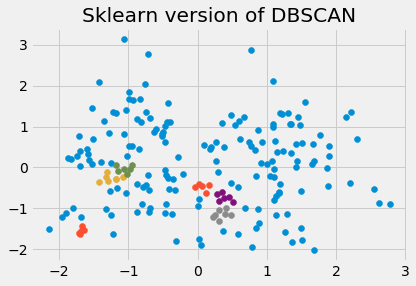

0.1


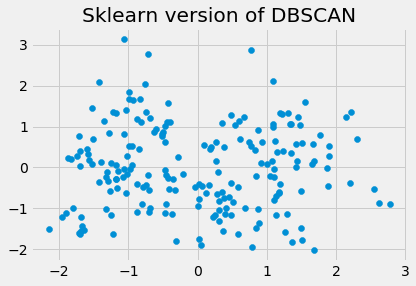

0.12


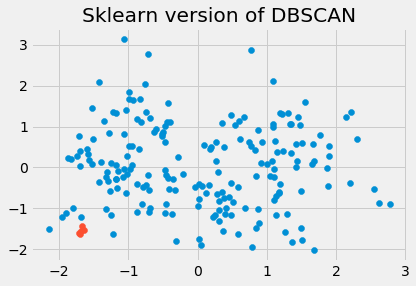

0.25


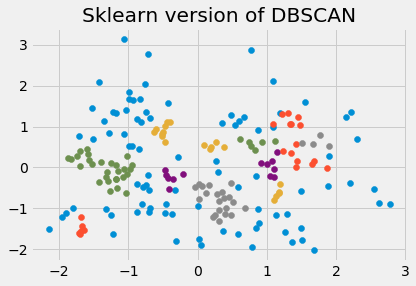

0.33


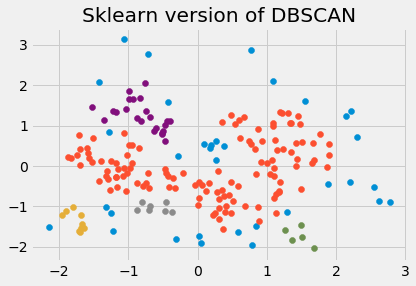

0.5


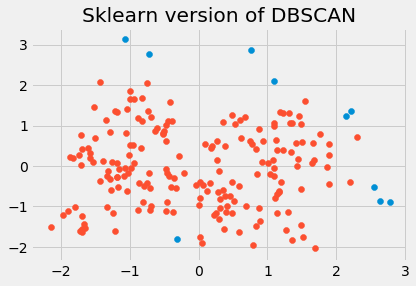

0.8


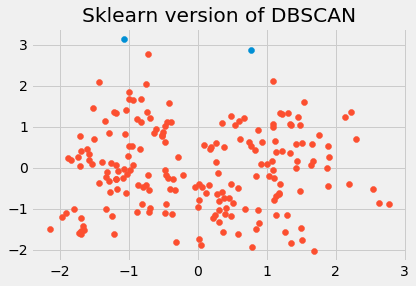

1


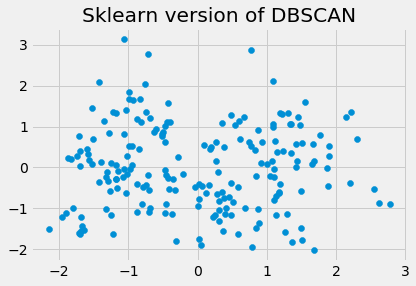

In [107]:
from sklearn.cluster import DBSCAN
b = [0.17,0.1,0.12,0.25,0.33,0.5,0.8,1]
for i in range(len(b)):
    v = b[i]
    print(v)
    model = DBSCAN(eps=v)
    yhat = model.fit_predict(df2)
    clusters = unique(yhat)
    for cluster in clusters:
        row_ix = where(yhat == cluster)
        plt.scatter(df2[row_ix, 0], df2[row_ix, 1])
        plt.title("Sklearn version of DBSCAN")
        plt.style.use('fivethirtyeight')
    plt.show()

#### DBSCAN doesnot perform well (for all eps values) in this dataset. It perform worst at 1 eps value.

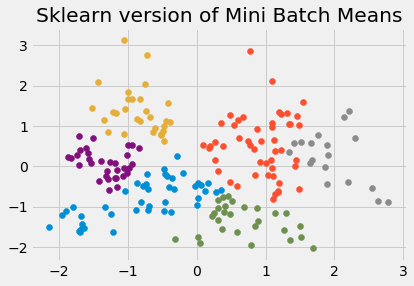

In [110]:
from sklearn.cluster import MiniBatchKMeans
model = MiniBatchKMeans()
model.fit(df2)
yhat = model.predict(df2)
clusters = unique(yhat)
for cluster in clusters:
    row_ix = where(yhat == cluster)
    plt.scatter(df2[row_ix, 0], df2[row_ix, 1])
##plt.scatter(cluster.cluster_centers_[:, 0], cluster.cluster_centers_[:, 1], marker = '+', label='Clusters', c = "red")
    plt.title("Sklearn version of Mini Batch Means")
    plt.style.use('fivethirtyeight')

#### MiniBatch creates 6 clusters it perform average in this dataset.

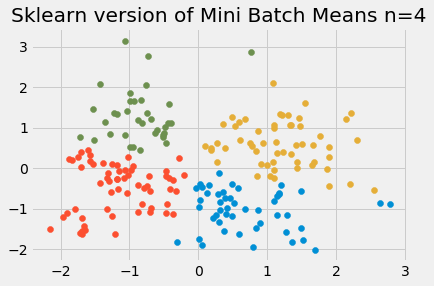

In [112]:
from sklearn.cluster import MiniBatchKMeans
model = MiniBatchKMeans(n_clusters=4)
model.fit(df2)
yhat = model.predict(df2)
clusters = unique(yhat)
for cluster in clusters:
    row_ix = where(yhat == cluster)
    plt.scatter(df2[row_ix, 0], df2[row_ix, 1])
##plt.scatter(cluster.cluster_centers_[:, 0], cluster.cluster_centers_[:, 1], marker = '+', label='Clusters', c = "red")
    plt.title("Sklearn version of Mini Batch Means n=4")
    plt.style.use('fivethirtyeight')

0.17


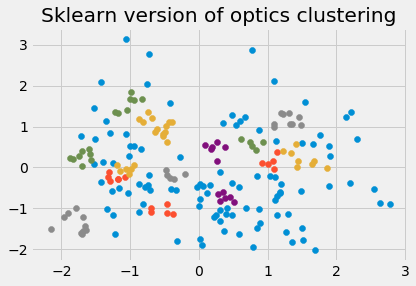

0.1


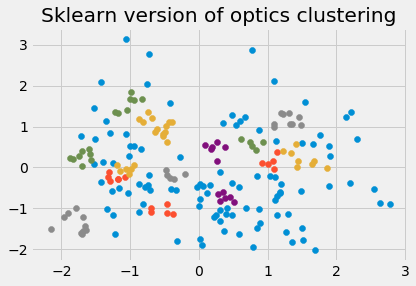

0.12


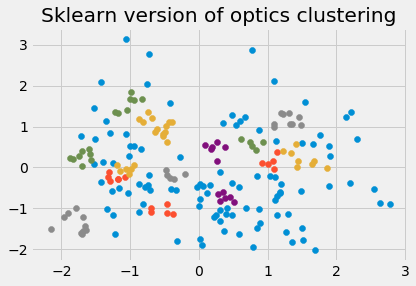

0.25


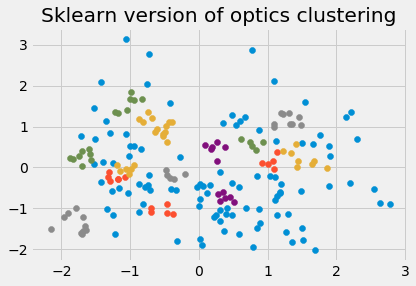

0.33


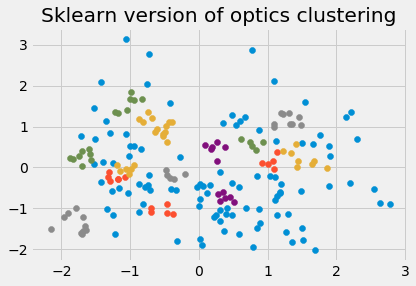

0.5


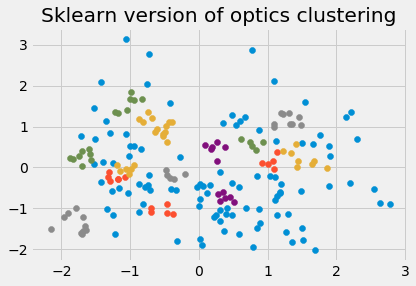

0.8


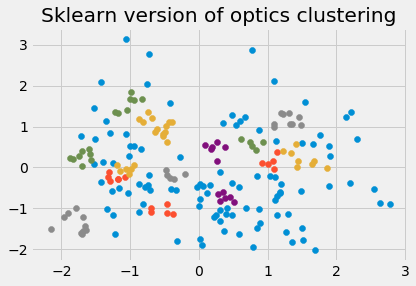

1


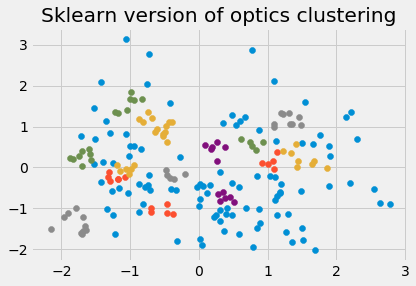

In [113]:
from sklearn.cluster import OPTICS
b = [0.17,0.1,0.12,0.25,0.33,0.5,0.8,1]
for i in range(len(b)):
    v = b[i]
    print(v)
    model = OPTICS(eps=v)
    yhat = model.fit_predict(df2)
    clusters = unique(yhat)
    for cluster in clusters:
        row_ix = where(yhat == cluster)
        plt.scatter(df2[row_ix, 0], df2[row_ix, 1])
        plt.title("Sklearn version of optics clustering")
        plt.style.use('fivethirtyeight')
    plt.show()

#### OPTICS doesnot perform well as it creates too many clusters for every eps value

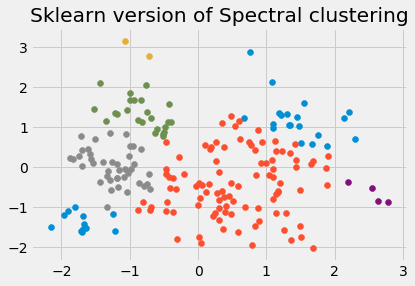

In [114]:
from sklearn.cluster import SpectralClustering

model = SpectralClustering()
yhat = model.fit_predict(df2)
clusters = unique(yhat)
for cluster in clusters:
    row_ix = where(yhat == cluster)
    plt.scatter(df2[row_ix, 0], df2[row_ix, 1])
    plt.title("Sklearn version of Spectral clustering")
    plt.style.use('fivethirtyeight')

#### Spectral Clustering creates 6 clusters (too many clusters)

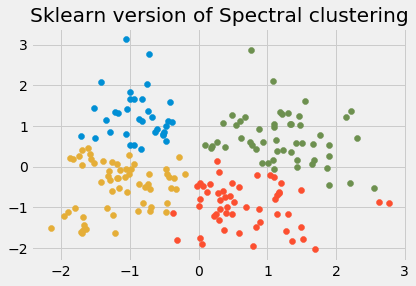

In [116]:
from sklearn.cluster import SpectralClustering

model = SpectralClustering(n_clusters = 4)
yhat = model.fit_predict(df2)
clusters = unique(yhat)
for cluster in clusters:
    row_ix = where(yhat == cluster)
    plt.scatter(df2[row_ix, 0], df2[row_ix, 1])
    plt.title("Sklearn version of Spectral clustering")
    plt.style.use('fivethirtyeight')

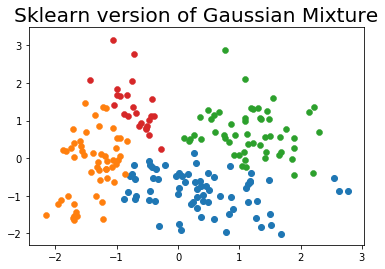

In [13]:
from sklearn.mixture import GaussianMixture

model = GaussianMixture(n_components = 4)
yhat = model.fit_predict(df2)
clusters = unique(yhat)
for cluster in clusters:
    row_ix = where(yhat == cluster)
    plt.scatter(df2[row_ix, 0], df2[row_ix, 1])
    plt.title("Sklearn version of Gaussian Mixture")
    plt.style.use('fivethirtyeight')

#### GMM perform well but some misclassify

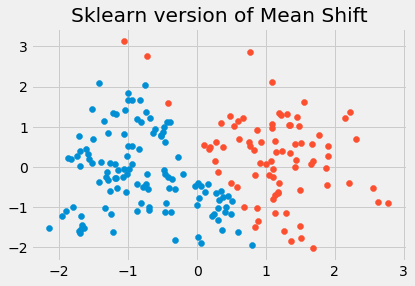

In [71]:
from sklearn.cluster import MeanShift
from sklearn.datasets import make_blobs
from sklearn.cluster import MeanShift, estimate_bandwidth
bandwidth = estimate_bandwidth(df2, quantile=0.2, n_samples=500)
model = MeanShift(bandwidth=bandwidth)
model.fit(df2)
yhat = model.fit_predict(df2)
clusters = unique(yhat)
for cluster in clusters:
    row_ix = where(yhat == cluster)
    plt.scatter(df2[row_ix, 0], df2[row_ix, 1])
    plt.title("Sklearn version of Mean Shift")
    plt.style.use('fivethirtyeight')

#### Creates two clusters but if line is drawn it clearly classify the two classes